## Import packages

In [5]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
from matplotlib import gridspec
import random                        # for generating random numbers
import seaborn as sns
import pandas as pd
import sys
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error

## Load the data

In [11]:
x0_df = pd.read_csv("data/nonlinear_vectorfield_data_x0.txt", names=["x0", "y0"])
x1_df = pd.read_csv("data/nonlinear_vectorfield_data_x1.txt", names=["x1", "y1"])
x0_np = np.loadtxt("data/nonlinear_vectorfield_data_x0.txt")
x1_np = np.loadtxt("data/nonlinear_vectorfield_data_x1.txt")

## Part 1

Estimate the vector field with a linear operator

Compute the mean squared error to the solution after $\Delta$ t as close as possible to $x_{1}$

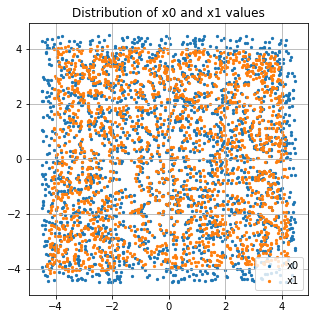

In [12]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(x0_np[:,0], x0_np[:, 1], s = 5, label='x0')
ax.scatter(x1_np[:,0], x1_np[:, 1], s = 5, label="x1")
ax.set_title("Distribution of x0 and x1 values")
ax.legend()
ax.grid()

fig.savefig('Part1_distributionX0X1', dpi=150)

In [13]:
delta_t = 1
v = (x1_np - x0_np) / delta_t
A = np.linalg.lstsq(x0_np, v, rcond=None)[0]
A

array([[-0.01001601,  0.00086727],
       [-0.00025349, -0.04326714]])

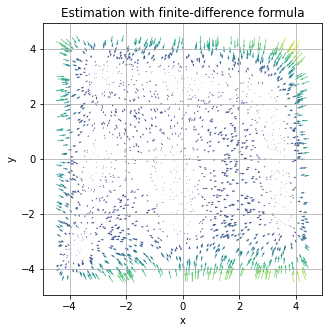

In [14]:
fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot()
ax2.quiver(x0_np[:,0], x0_np[:, 1], v[:,0], v[:, 1], np.linalg.norm(v,axis=1),cmap='viridis')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Estimation with finite-difference formula")
ax2.grid()

fig2.savefig('Part1_FiniteDiffFormula', dpi=150)

In [16]:
sol = np.zeros((x0_np.shape[0], 2))
for i in range(0,len(x0_np)):
    sol[i, :] = solve_ivp(lambda t, x: A @ x, t_span=[0, 0.1], t_eval=[0.1], y0=x0_np[i, :]).y.reshape(-1)

In [17]:
mse = mean_squared_error(x1_np, x0_np)
print('Mean squared error:', mse )

Mean squared error: 0.025264009028028604


## Part 2